# **Bank Customer Segmentation using K-Means and PCA**

**Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the dataset**

https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
dataSet = pd.read_csv('/content/CC GENERAL.csv')

**Data Preprocessing and Exploration**

In [3]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)

dataSet

Data shape (rows, cols):  (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
dataSet.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
dataSet.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
dataSet['MINIMUM_PAYMENTS'].fillna(dataSet['MINIMUM_PAYMENTS'].mean(), inplace=True)
dataSet['CREDIT_LIMIT'].fillna(dataSet['CREDIT_LIMIT'].mean(), inplace=True)

In [8]:
X = dataSet.iloc[:, 1:].values

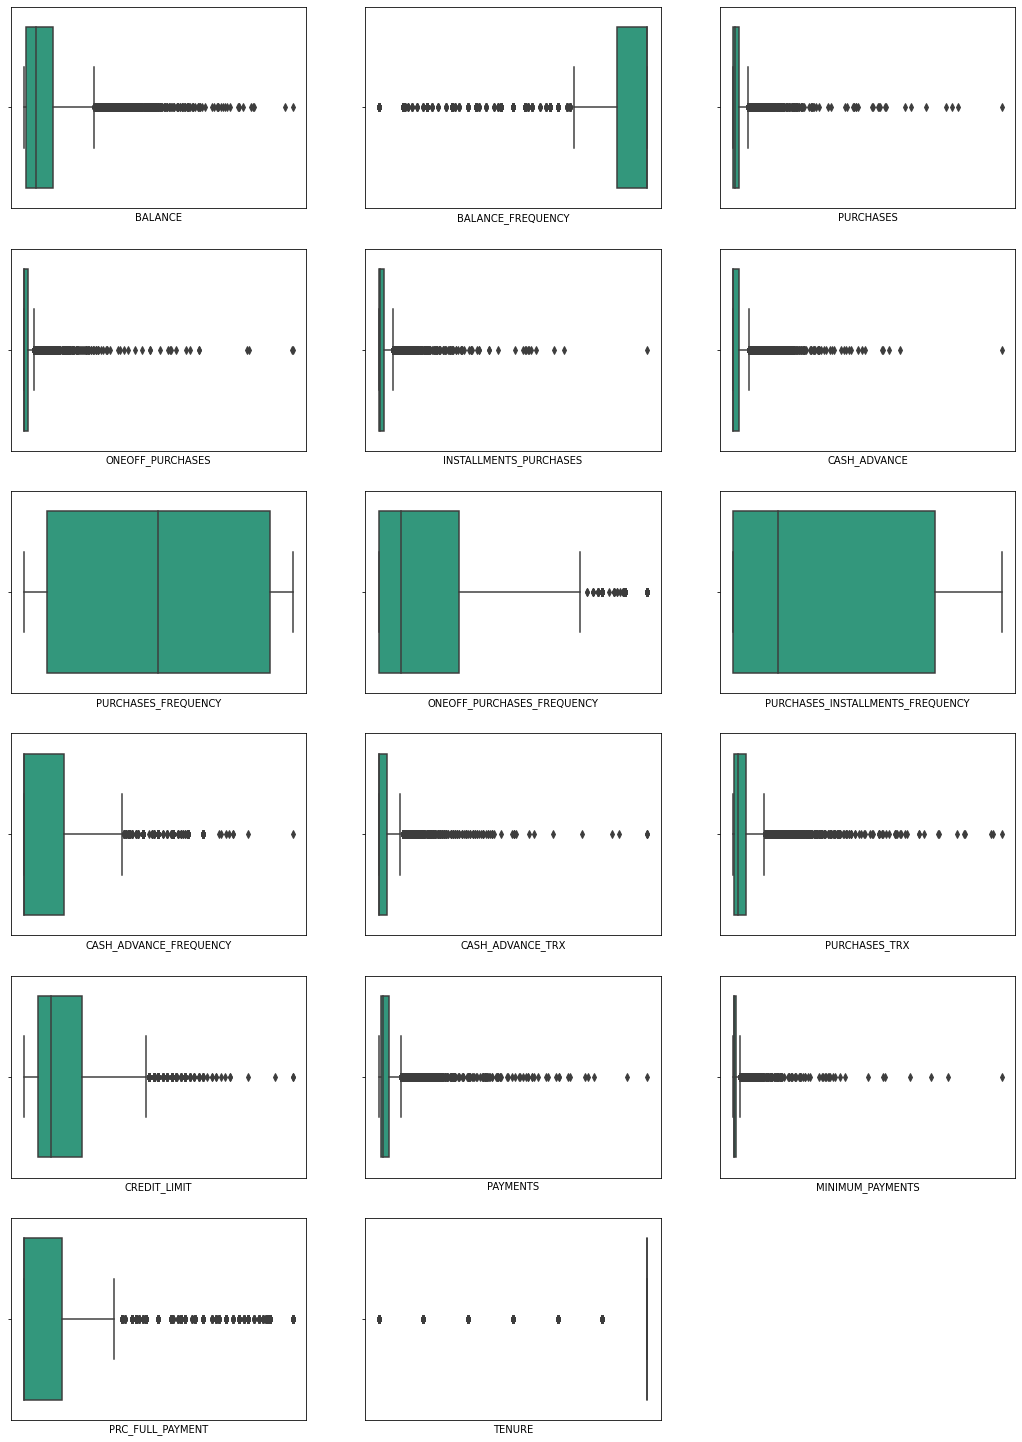

In [9]:
i = 1
plt.figure(figsize=(18, 26))

for feature in dataSet.columns[1:]:
  plt.subplot(6, 3, i)
  plt.xticks([])
  plt.yticks([])
  sns.boxplot(x = dataSet[feature], color = plt.cm.viridis([0.6])[0])
  i+=1
plt.show()

**Feature Scaling and Normalization**

In [10]:
from sklearn.preprocessing import StandardScaler, normalize

sc = StandardScaler()
X = sc.fit_transform(X)

X = normalize(X)

**Dimensionality Reduction with Principal Component Analysis (PCA)**

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [12]:
X

array([[-0.48982548, -0.67967854],
       [-0.51879091,  0.54501004],
       [ 0.33088499,  0.26897839],
       ...,
       [ 0.1887982 , -0.24849758],
       [-0.31301788, -0.17138315],
       [ 0.01292918,  0.09787295]])

**Silhouette Coefficient Method**

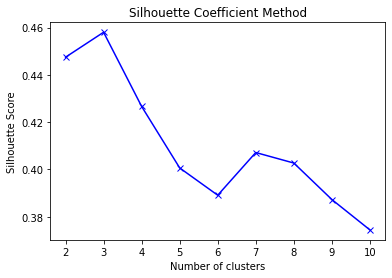

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
m = 11

for i in range(2, m):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    preds = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, preds, metric='euclidean'))
    
plt.plot(range(2, m), scores, 'bx-')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

**K-means Clustering**

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(X)

**Visualising the clusters**

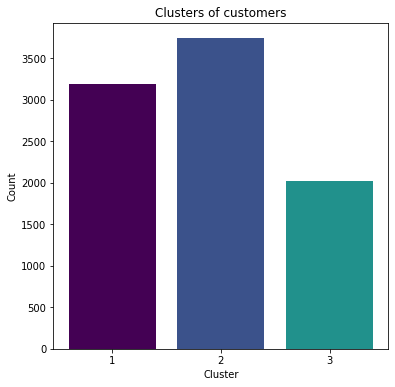

In [17]:
color = plt.cm.viridis([0, 0.25, 0.5])
plt.figure(figsize=(6, 6))

for i in range(3):
  plt.bar(str(i+1),len(X[y == i, 0]), color = color[i])

plt.title('Clusters of customers')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

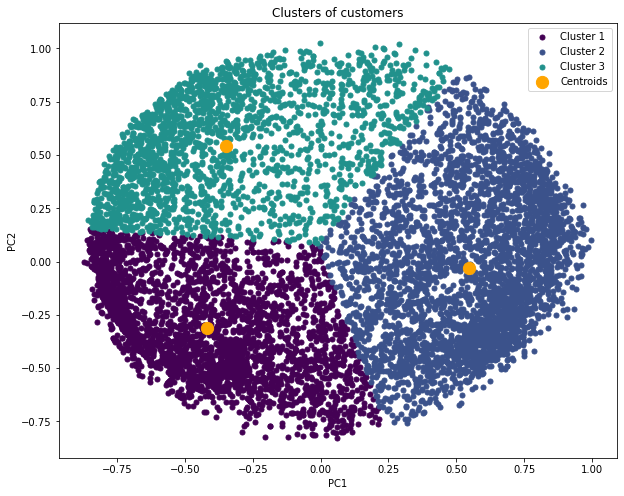

In [16]:
color = plt.cm.viridis([0, 0.25, 0.5])
plt.figure(figsize=(10, 8))

for i in range(3):
  plt.scatter(X[y == i, 0], 
              X[y == i, 1], s = 25, 
              label = 'Cluster {}'.format(i + 1), 
              color = color[i])
  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'orange', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()